In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from citipy import citipy 
import random as random
import time as time

In [2]:
#Create Empty Arrays, Variables, + Empty DF
df= pd.DataFrame(columns =["Latitude","Longitude","City","Temperature","Humidity","Cloudiness","Wind_Speed"])
lat = []
long = []
temp = []
cities = []
humid = []
clouds = []
wind = []
counter = 0
api_key = "2b82346ed86d1f148705d37ae2c14ee7"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [3]:
#Loop through range of 500 for random lat/longs to generate initial DF
for x in range(0,1500):
    lat.append(random.uniform(0,90))
    long.append(random.uniform(0,180))
df["Latitude"]=lat
df["Longitude"]=long
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed
0,18.573216,124.253405,NaN,NaN,NaN,NaN,NaN
1,77.851558,92.199711,NaN,NaN,NaN,NaN,NaN
2,55.880142,4.538902,NaN,NaN,NaN,NaN,NaN
3,52.569771,97.195838,NaN,NaN,NaN,NaN,NaN
4,9.602096,163.459673,NaN,NaN,NaN,NaN,NaN


In [4]:
#Make CitiPy calls to find closests cities to random Lat/Longs
for index, row in df.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities.append(city.city_name)
df['City']=cities
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed
0,18.573216,124.253405,san vicente,NaN,NaN,NaN,NaN
1,77.851558,92.199711,talnakh,NaN,NaN,NaN,NaN
2,55.880142,4.538902,harlingen,NaN,NaN,NaN,NaN
3,52.569771,97.195838,toora-khem,NaN,NaN,NaN,NaN
4,9.602096,163.459673,butaritari,NaN,NaN,NaN,NaN


In [5]:
df = df.drop_duplicates("City",keep="first")
len(df)

774

In [6]:
df = df.reset_index(drop=True)
len(df)

774

In [9]:
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed
0,18.573216,124.253405,san vicente,NaN,NaN,NaN,NaN
1,77.851558,92.199711,talnakh,NaN,NaN,NaN,NaN
2,55.880142,4.538902,harlingen,NaN,NaN,NaN,NaN
3,52.569771,97.195838,toora-khem,NaN,NaN,NaN,NaN
4,9.602096,163.459673,butaritari,NaN,NaN,NaN,NaN


In [10]:
#Loop through rows to make API calls from OpenWeather to complete DF
for index, row in df.iterrows():
    counter = counter + 1
    city = row["City"]
    target_url = url + "&q=" + city
    print("Looping through City number "+str(counter))
    print("City name is "+row["City"])
    print("@" + target_url)
    print("____________________________________________")
    try:
        info = req.get(target_url).json()
        temp.append(info['main']['temp'])
        humid.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind.append(info['wind']['speed'])
        #Set sleep timer to allow for complete calls - API limits to 60 per minute
        time.sleep(1.01)
    except:
        temp.append("NaN")
        humid.append("NaN")
        clouds.append("NaN")
        wind.append("NaN")
        continue
        
print("____________________________________________")
print("Loop Complete")
print("____________________________________________")

Looping through City number 1
City name is san vicente
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=san vicente
____________________________________________
Looping through City number 2
City name is talnakh
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=talnakh
____________________________________________
Looping through City number 3
City name is harlingen
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=harlingen
____________________________________________
Looping through City number 4
City name is toora-khem
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=toora-khem
____________________________________________
Looping through City number 5
City name is butaritari
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c

Looping through City number 40
City name is berlevag
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=berlevag
____________________________________________
Looping through City number 41
City name is siverek
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=siverek
____________________________________________
Looping through City number 42
City name is ossora
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=ossora
____________________________________________
Looping through City number 43
City name is kedrovyy
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kedrovyy
____________________________________________
Looping through City number 44
City name is palu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=palu
____

Looping through City number 79
City name is asmara
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=asmara
____________________________________________
Looping through City number 80
City name is batagay
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=batagay
____________________________________________
Looping through City number 81
City name is usinsk
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=usinsk
____________________________________________
Looping through City number 82
City name is chokurdakh
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=chokurdakh
____________________________________________
Looping through City number 83
City name is kamaishi
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kamai

Looping through City number 118
City name is mamburao
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=mamburao
____________________________________________
Looping through City number 119
City name is svetlaya
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=svetlaya
____________________________________________
Looping through City number 120
City name is jalu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=jalu
____________________________________________
Looping through City number 121
City name is dorobantu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=dorobantu
____________________________________________
Looping through City number 122
City name is kungurtug
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q

Looping through City number 157
City name is felidhoo
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=felidhoo
____________________________________________
Looping through City number 158
City name is panzhihua
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=panzhihua
____________________________________________
Looping through City number 159
City name is jinka
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=jinka
____________________________________________
Looping through City number 160
City name is pahalgam
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=pahalgam
____________________________________________
Looping through City number 161
City name is siddipet
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&

Looping through City number 196
City name is bac giang
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=bac giang
____________________________________________
Looping through City number 197
City name is bamnet narong
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=bamnet narong
____________________________________________
Looping through City number 198
City name is raduzhnyy
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=raduzhnyy
____________________________________________
Looping through City number 199
City name is dumai
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=dumai
____________________________________________
Looping through City number 200
City name is ous
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2

Looping through City number 236
City name is den helder
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=den helder
____________________________________________
Looping through City number 237
City name is ust-tsilma
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=ust-tsilma
____________________________________________
Looping through City number 238
City name is tabriz
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tabriz
____________________________________________
Looping through City number 239
City name is skibotn
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=skibotn
____________________________________________
Looping through City number 240
City name is olga
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee

Looping through City number 275
City name is bafia
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=bafia
____________________________________________
Looping through City number 276
City name is jining
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=jining
____________________________________________
Looping through City number 277
City name is bozoum
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=bozoum
____________________________________________
Looping through City number 278
City name is akyab
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=akyab
____________________________________________
Looping through City number 279
City name is neryungri
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=neryungri
___

Looping through City number 314
City name is kyra
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kyra
____________________________________________
Looping through City number 315
City name is kargat
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kargat
____________________________________________
Looping through City number 316
City name is faya
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=faya
____________________________________________
Looping through City number 317
City name is gopalpur
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=gopalpur
____________________________________________
Looping through City number 318
City name is chifeng
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=chifeng
_______

Looping through City number 353
City name is tripoli
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tripoli
____________________________________________
Looping through City number 354
City name is ostersund
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=ostersund
____________________________________________
Looping through City number 355
City name is turbiv
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=turbiv
____________________________________________
Looping through City number 356
City name is novomykolayivka
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=novomykolayivka
____________________________________________
Looping through City number 357
City name is harer
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d3

Looping through City number 392
City name is sinkat
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=sinkat
____________________________________________
Looping through City number 393
City name is tupik
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tupik
____________________________________________
Looping through City number 394
City name is spasskoye
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=spasskoye
____________________________________________
Looping through City number 395
City name is gangotri
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=gangotri
____________________________________________
Looping through City number 396
City name is lokosovo
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=lo

Looping through City number 431
City name is stovring
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=stovring
____________________________________________
Looping through City number 432
City name is gigmoto
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=gigmoto
____________________________________________
Looping through City number 433
City name is jumla
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=jumla
____________________________________________
Looping through City number 434
City name is norwich
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=norwich
____________________________________________
Looping through City number 435
City name is abu dhabi
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=abu

Looping through City number 470
City name is kapustin yar-1
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kapustin yar-1
____________________________________________
Looping through City number 471
City name is pingliang
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=pingliang
____________________________________________
Looping through City number 472
City name is ayorou
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=ayorou
____________________________________________
Looping through City number 473
City name is tashtagol
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tashtagol
____________________________________________
Looping through City number 474
City name is erenhot
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f1487

Looping through City number 510
City name is muroto
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=muroto
____________________________________________
Looping through City number 511
City name is imeni zhelyabova
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=imeni zhelyabova
____________________________________________
Looping through City number 512
City name is kargasok
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kargasok
____________________________________________
Looping through City number 513
City name is zgierz
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=zgierz
____________________________________________
Looping through City number 514
City name is tataranu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d

Looping through City number 549
City name is krasnyy chikoy
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=krasnyy chikoy
____________________________________________
Looping through City number 550
City name is esil
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=esil
____________________________________________
Looping through City number 551
City name is bozhou
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=bozhou
____________________________________________
Looping through City number 552
City name is linfen
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=linfen
____________________________________________
Looping through City number 553
City name is lanzhou
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q

Looping through City number 588
City name is krusevac
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=krusevac
____________________________________________
Looping through City number 589
City name is gwadar
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=gwadar
____________________________________________
Looping through City number 590
City name is manali
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=manali
____________________________________________
Looping through City number 591
City name is tahta
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tahta
____________________________________________
Looping through City number 592
City name is rubtsovsk
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=rubtsov

Looping through City number 627
City name is nadym
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=nadym
____________________________________________
Looping through City number 628
City name is tadepallegudem
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=tadepallegudem
____________________________________________
Looping through City number 629
City name is ust-kuyga
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=ust-kuyga
____________________________________________
Looping through City number 630
City name is gulshat
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=gulshat
____________________________________________
Looping through City number 631
City name is ekibastuz
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d3

Looping through City number 666
City name is esso
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=esso
____________________________________________
Looping through City number 667
City name is kapit
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=kapit
____________________________________________
Looping through City number 668
City name is imeni poliny osipenko
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=imeni poliny osipenko
____________________________________________
Looping through City number 669
City name is zdvinsk
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=zdvinsk
____________________________________________
Looping through City number 670
City name is guiyang
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705

Looping through City number 706
City name is sayat
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=sayat
____________________________________________
Looping through City number 707
City name is opobo
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=opobo
____________________________________________
Looping through City number 708
City name is mittweida
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=mittweida
____________________________________________
Looping through City number 709
City name is seymchan
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=seymchan
____________________________________________
Looping through City number 710
City name is okandja
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=okand

Looping through City number 745
City name is abu samrah
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=abu samrah
____________________________________________
Looping through City number 746
City name is putineiu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=putineiu
____________________________________________
Looping through City number 747
City name is mahibadhoo
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=mahibadhoo
____________________________________________
Looping through City number 748
City name is juba
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&q=juba
____________________________________________
Looping through City number 749
City name is sibu
@http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b82346ed86d1f148705d37ae2c14ee7&

In [11]:
#Transform values from arrays to DF
df["Temperature"]=temp
df["Humidity"]=humid
df["Cloudiness"]=clouds
df["Wind_Speed"]=wind

In [12]:
#Check DF Format
df.head(774)

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed
0,18.573216,124.253405,san vicente,71.6,83,75,11.41
1,77.851558,92.199711,talnakh,60.8,100,40,4.47
2,55.880142,4.538902,harlingen,56.73,100,69,1.12
3,52.569771,97.195838,toora-khem,59.7,79,82,2.19
4,9.602096,163.459673,butaritari,85.01,77,100,15.12
5,75.453283,25.720920,honningsvag,44.42,76,100,9.53
6,26.709294,71.656097,pokaran,90.53,55,35,2.01
7,84.030662,94.878678,khatanga,72.05,48,0,12.62
8,74.854654,119.252383,saskylakh,55.78,71,54,16.31
9,20.221390,61.821169,sur,87.38,41,74,4.76


In [13]:
#Remove Cities with Missing Data
df = df[df.Temperature != 'NaN']
#Check Unique Cities after Cleaning
len(df)

666

In [14]:
#Reset Index after removing NaN
df = df.reset_index(drop=True)
#Check Unique Cities after Cleaning
len(df)

666

In [15]:
#Check DF Format
df.head(666)

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind_Speed
0,18.573216,124.253405,san vicente,71.6,83,75,11.41
1,77.851558,92.199711,talnakh,60.8,100,40,4.47
2,55.880142,4.538902,harlingen,56.73,100,69,1.12
3,52.569771,97.195838,toora-khem,59.7,79,82,2.19
4,9.602096,163.459673,butaritari,85.01,77,100,15.12
5,75.453283,25.720920,honningsvag,44.42,76,100,9.53
6,26.709294,71.656097,pokaran,90.53,55,35,2.01
7,84.030662,94.878678,khatanga,72.05,48,0,12.62
8,74.854654,119.252383,saskylakh,55.78,71,54,16.31
9,20.221390,61.821169,sur,87.38,41,74,4.76


In [20]:
#Export CSV
df.to_csv('WeatherPy-Data.csv', index=False)

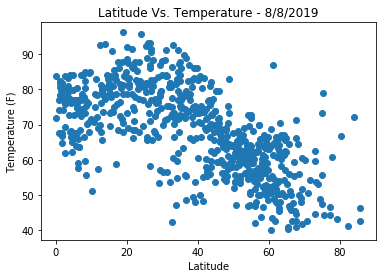

In [31]:
#Temperature vs Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature - 8/8/2019")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("LatVTemp.png")
plt.show()

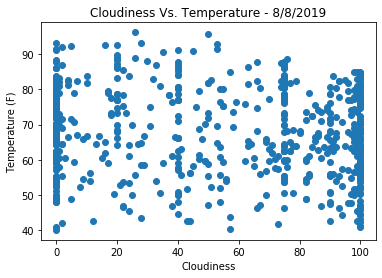

In [32]:
#Humidity vs. Temp Scatter Plot
plt.scatter(df["Cloudiness"],df["Temperature"],marker ="o")
plt.title("Cloudiness Vs. Temperature - 8/8/2019")
plt.xlabel("Cloudiness")
plt.ylabel("Temperature (F)")
plt.savefig("CloudinessVTemp.png")
plt.show()

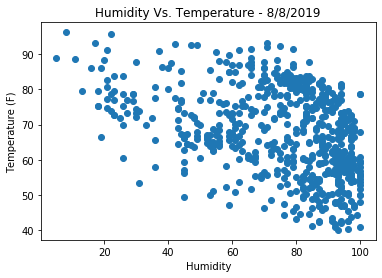

In [33]:
#Cloudiness vs. Temp Plot
plt.scatter(df["Humidity"],df["Temperature"],marker ="o")
plt.title("Humidity Vs. Temperature - 8/8/2019")
plt.xlabel("Humidity")
plt.ylabel("Temperature (F)")
plt.savefig("HumidityVTemp.png")
plt.show()

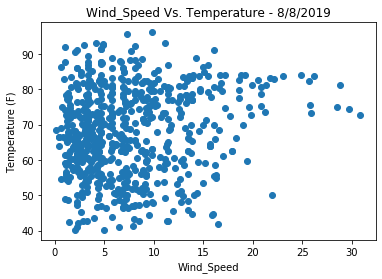

In [34]:
#Wind Speed vs. Temp
plt.scatter(df["Wind_Speed"],df["Temperature"],marker ="o")
plt.title("Wind_Speed Vs. Temperature - 8/8/2019")
plt.xlabel("Wind_Speed")
plt.ylabel("Temperature (F)")
plt.savefig("Wind_SpeedVTemp.png")
plt.show()

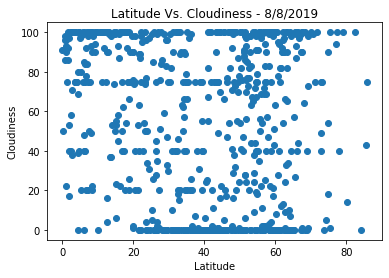

In [35]:
#Cloudiness vs Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Cloudiness"],marker ="o")
plt.title("Latitude Vs. Cloudiness - 8/8/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("LatVCloudiness.png")
plt.show()

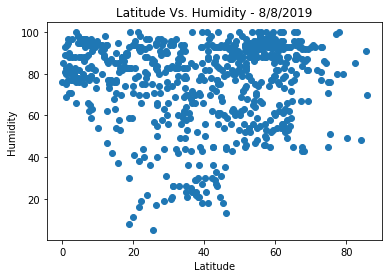

In [36]:
#Humidity vs Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity - 8/8/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("LatVHumidity.png")
plt.show()

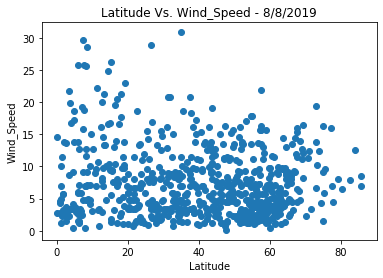

In [37]:
#Wind_Speed vs Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Wind_Speed"],marker ="o")
plt.title("Latitude Vs. Wind_Speed - 8/8/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.savefig("LatVWind_Speed.png")
plt.show()

In [38]:
#Print Written Analysis
print("This project pulled data from the OpenWeather API.")
print("It randomly selected 666 coordinates with valid cities located close to them.")
print("I plotted Lattitude VS several weather variables, including Temperature, Wind Speed, Humidity, and Cloudiness.")
print("Three trends that showed up follow:")
print("1. There appears to be a very clear coorelation between Lattitude and Temperature. The further away form the qeuator, the cooler the temperature.")
print("2. The relationship between humidity and latitude is less clear. It appears that the data clusters around high aread of humidity both close to the qeuator - 0 deg lattitude - and close to the pole - 180 deg lat. The lowest humidity is clearly in the middle lattitudes.")
print("3. There does not seem to be a discernable trend between lattitude and wind speed, however I suspect that this data would vary form day-to-day based on storm patterns. How example, a hurricant system near the equator may influence this and cause a coorelation with higher verage winds along lower latitudes.")

This project pulled data from the OpenWeather API.
It randomly selected 666 coordinates with valid cities located close to them.
I plotted Lattitude VS several weather variables, including Temperature, Wind Speed, Humidity, and Cloudiness.
Three trends that showed up follow:
1. There appears to be a very clear coorelation between Lattitude and Temperature. The further away form the qeuator, the cooler the temperature.
2. The relationship between humidity and latitude is less clear. It appears that the data clusters around high aread of humidity both close to the qeuator - 0 deg lattitude - and close to the pole - 180 deg lat. The lowest humidity is clearly in the middle lattitudes.
3. There does not seem to be a discernable trend between lattitude and wind speed, however I suspect that this data would vary form day-to-day based on storm patterns. How example, a hurricant system near the equator may influence this and cause a coorelation with higher verage winds along lower latitudes.
